In [93]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import numpy as np
from qutip import destroy, qeye, sigmaz, tensor

(0.0, 1.0, 0.0, 1.0)

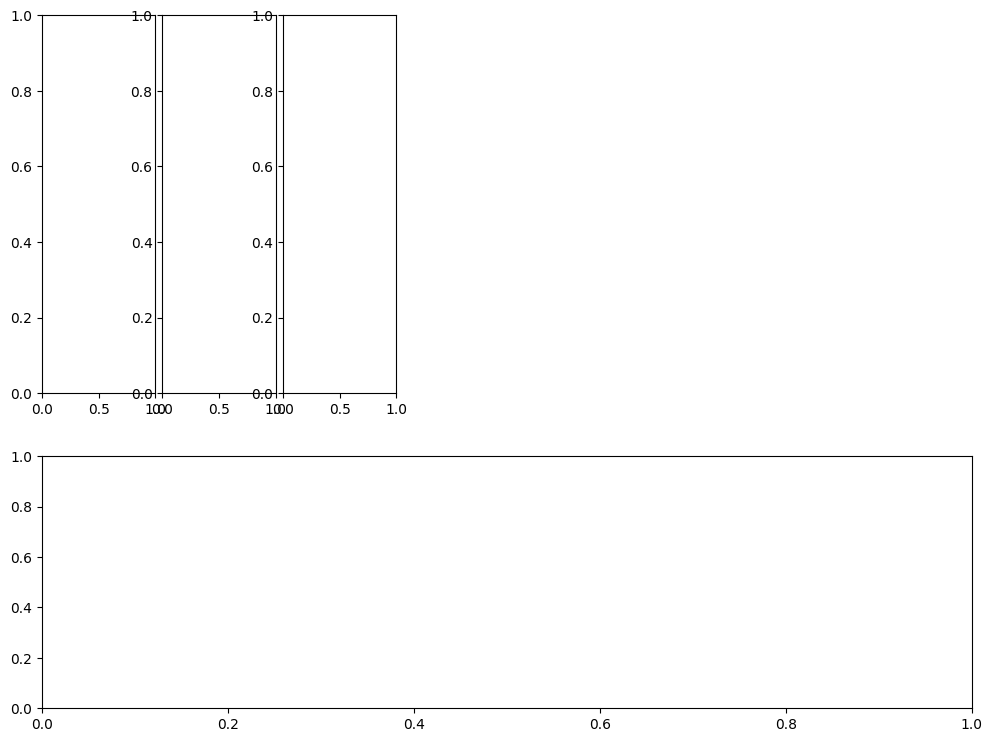

In [94]:
import matplotlib.pyplot as plt

mosaic = """
ABCD
EEEE
"""

fig, axd = plt.subplot_mosaic(mosaic, figsize=(12, 9), gridspec_kw={
    'height_ratios': [1.5, 1],
    'width_ratios': [1, 1, 1, 5],
    'wspace': 0.03,
    'hspace': 0.2
})

axd["D"].set_xticks([])
axd["D"].set_yticks([])
axd['D'].axis("off")

# Energy levels

## 1 emitter

In [95]:
N = 3

a = tensor(destroy(N), qeye(2))
sigm = tensor(qeye(N), destroy(2))
sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.7

kappa = 0.03
gamma = 0.03
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm,
]

H = (
    wc * a.dag() * a
    + wa * sigm.dag() * sigm
    + g * (a.dag() * sigm + a * sigm.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm.dag() * sigm

H_eff.eigenenergies()

array([ 0.        +0.j  ,  3.3       -0.03j,  4.7       -0.03j,
        7.01005051-0.06j,  8.98994949-0.06j, 12.        -0.09j])

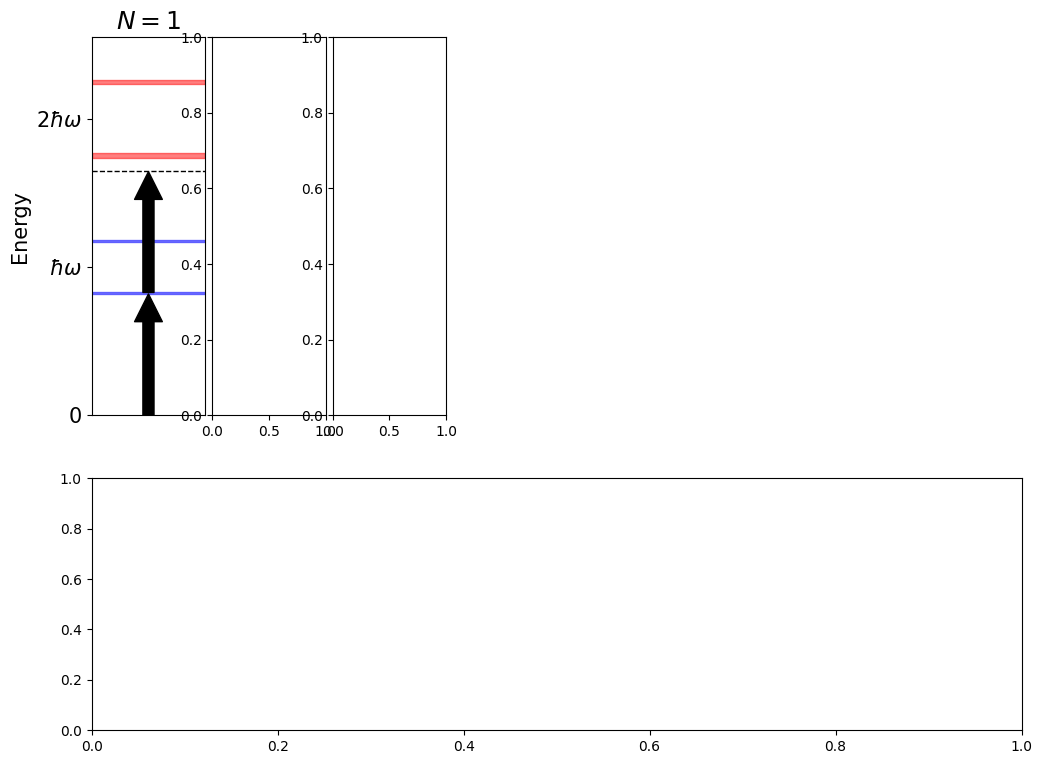

In [96]:
# N=1
ax = axd['A']

for energy in H_eff.eigenenergies()[1:3]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[3:5]:
    center = np.real(energy)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.06), (0.5, 2*polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)


ax.set_ylim(0, 10.2)

ax.set_yticks([0, wc, 2*wc])
ax.set_yticklabels([0, "$\hbar\omega$", "2$\hbar\omega$"], fontsize=15)
ax.set_ylabel("Energy", fontsize=15)

ax.set_xticks([])
ax.set_title("$N=1$", fontsize=18)
fig

## 2 emitters

In [97]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2))
# sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.7

kappa = 0.03
gamma = 0.03
# dephasing = 500e-6
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    # np.sqrt(dephasing) * sigz,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2

H_eff.eigenenergies()

array([ 0.        +0.j  ,  3.01005051-0.03j,  4.        -0.03j,
        4.98994949-0.03j,  6.28535718-0.06j,  8.        -0.06j,
        8.        -0.06j,  9.71464282-0.06j, 10.6       -0.09j,
       12.        -0.09j, 13.4       -0.09j, 16.        -0.12j])

6.2853571800517765
7.9999999999999964
8.00000000000001
9.714642819948228


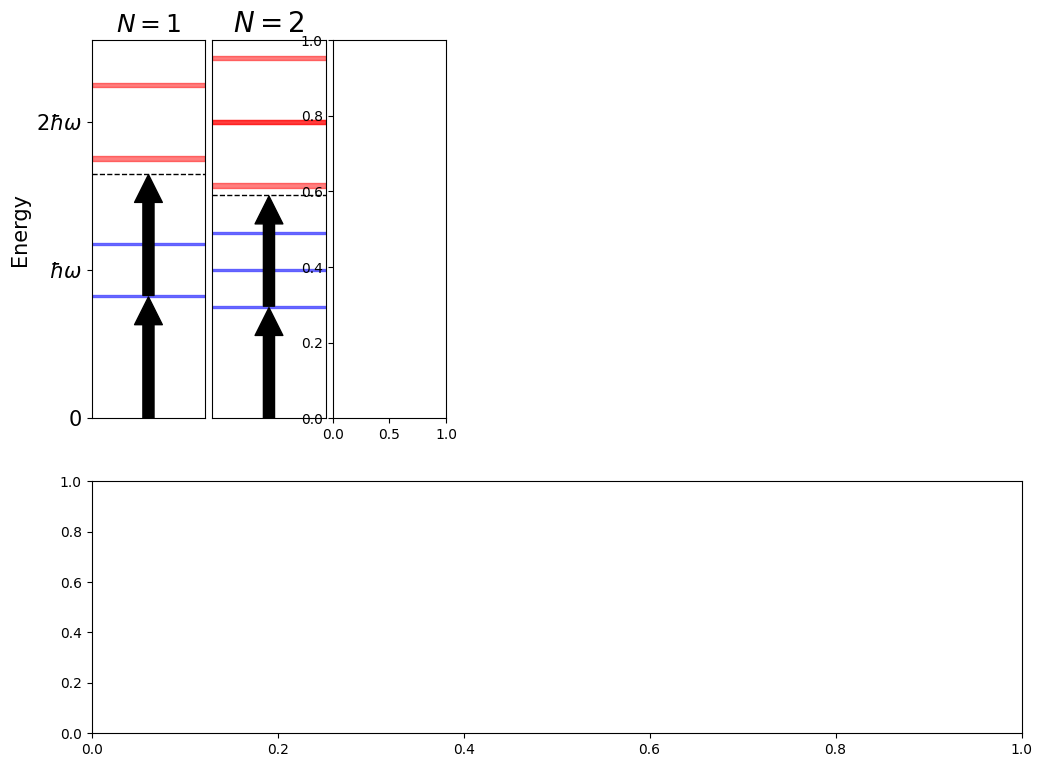

In [98]:
# N=2
ax = axd['B']

for energy in H_eff.eigenenergies()[1:4]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[4:8]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.06), (0.5, 2*polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)

ax.set_ylim(0, 10.2)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("$N=2$", fontsize=20)
fig

## 3 emitters

In [99]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2), qeye(2))
sigm3 = tensor(qeye(N), qeye(2), qeye(2), destroy(2))

wc = 4
wa = 4
g = 0.7

kappa = 0.03
gamma = 0.03
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    np.sqrt(gamma) * sigm3,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + wa * sigm3.dag() * sigm3
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
    + g * (a.dag() * sigm3 + a * sigm3.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2 - 1j * gamma * sigm3.dag() * sigm3

H_eff.eigenenergies()

array([ 0.        +0.j  ,  2.78756443-0.03j,  4.        -0.03j,
        4.        -0.03j,  5.21243557-0.03j,  5.78640564-0.06j,
        7.3       -0.06j,  7.3       -0.06j,  8.        -0.06j,
        8.7       -0.06j,  8.7       -0.06j,  9.67836265-0.09j,
       10.21359436-0.06j, 11.01005051-0.09j, 11.01005051-0.09j,
       12.        -0.09j, 12.98994949-0.09j, 12.98994949-0.09j,
       14.28535718-0.12j, 14.32163735-0.09j, 16.        -0.12j,
       16.        -0.12j, 17.71464282-0.12j, 20.        -0.15j])

5.786405637882131
7.299999999999988
7.300000000000009
8.000000000000004
8.699999999999994
8.699999999999998
9.678362646751227


/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/ipykernel_18438/1355402278.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


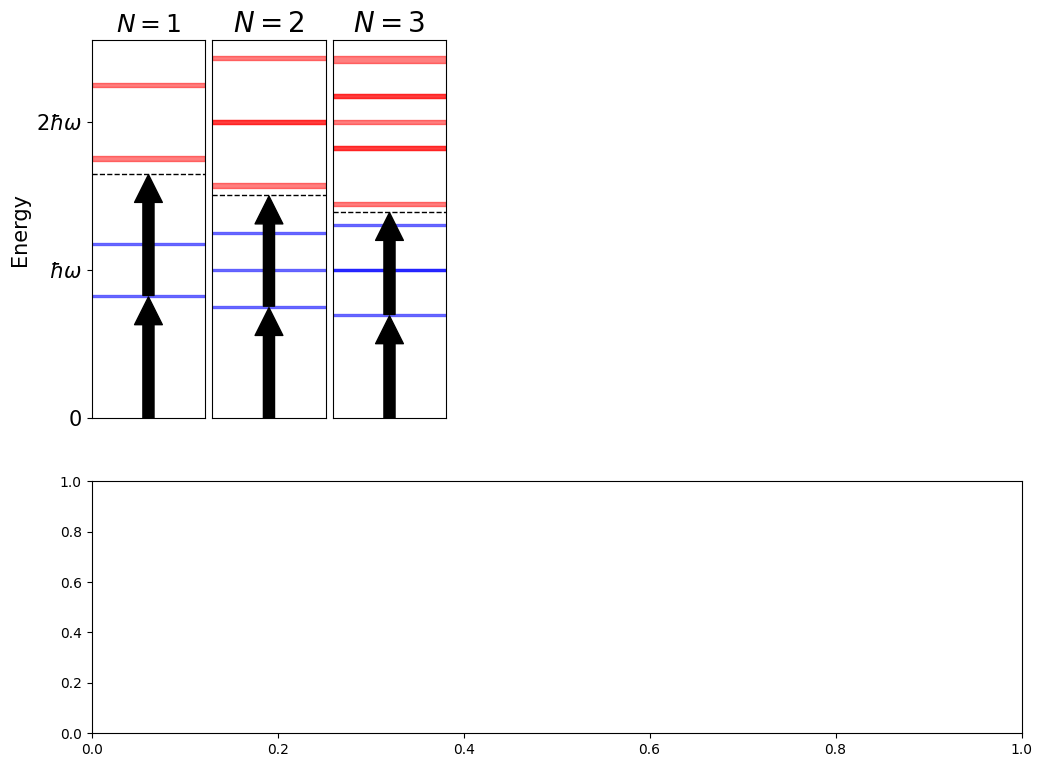

In [100]:
# N=3
ax = axd['C']

for energy in H_eff.eigenenergies()[1:5]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[5:12]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -0.1), (0.5, polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-0.06), (0.5, 2*polariton+0.05),
                                arrowstyle='simple', mutation_scale=40, color='black', lw=1)
ax.add_patch(arrow)

ax.axhline(2*polariton, linestyle='--', color='black', lw=1)

ax.set_yticks([])
ax.set_xticks([])
ax.set_title("$N=3$", fontsize=20)
ax.set_ylim(0, 10.2)

fig.tight_layout()
fig

# steady state population

In [101]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import math
from qutip import destroy, expect, qeye, sigmaz, steadystate, tensor

In [102]:
def poisson(x, lam):
    return lam**x * np.exp(-lam) / math.factorial(x)

In [103]:
N = 10

a = tensor(destroy(N), qeye(2))
sigm = tensor(qeye(N), destroy(2))
sigz = tensor(qeye(N), sigmaz())

wc = 4
wa = 4
g = 0.7

kappa = 0.03
gamma = 0.03
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm,
]

def H(pump_freq, pump_power, blockade = False):
    h = (
        pump_power * (a + a.dag())
        + (wc - pump_freq) * a.dag() * a
    )
    if blockade:
        h += (
            + (wa - pump_freq) * sigm.dag() * sigm
            + g * (a.dag() * sigm + a * sigm.dag())
        )
    return h

In [104]:
pump_power = kappa * 0.5

# no blockade case
h = H(wc, pump_power, blockade=False)
ss = steadystate(h, c_ops)
no_blockade_photon_numbers = ss.ptrace(0).diag() / sum(ss.ptrace(0).diag())
mean_no_blockade = expect(a.dag() * a, ss)

# blockade case
p = H(0, 0, True).eigenenergies()[1]
h = H(p, pump_power, blockade=True)
ss = steadystate(h, c_ops)
blockade_photon_numbers = ss.ptrace(0).diag() / sum(ss.ptrace(0).diag())
mean_blockade = expect(a.dag() * a, ss)

# poisson distribution
p_no_blockade = [poisson(i, mean_blockade) for i in range(N)]
p_blockade = [poisson(i, mean_no_blockade) for i in range(N)]

# bar chart of photon number distribution
idx = 8
x = np.arange(N)[:idx]
width = 0.15
offset = 0.04
ax = axd["E"]

ax.bar(x-1.5*width-offset, no_blockade_photon_numbers[:idx], width, label=f"No blockade ($\langle a^\dagger a\\rangle=${mean_no_blockade:.1f})", color='#1f77b4')
ax.bar(x-width/2-offset, p_blockade[:idx], width, label=f"Poisson distribution ($\lambda={mean_no_blockade:.1f}$)", color="#aec7e8")
ax.bar(x+width/2+offset, blockade_photon_numbers[:idx], width, label=f"Blockade ($\langle a^\dagger a\\rangle=${mean_blockade:.1f})", color="#ff7f0e")
ax.bar(x+1.5*width+offset, p_no_blockade[:idx], width, label=f"Poisson distribution ($\lambda={mean_blockade:.1f}$)", color="#ffbb78")
ax.set_xticks(x)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_yscale("log")
ax.set_ylim(1e-5, 2)
ax.legend(fontsize=12)
ax.set_xlabel(r"Fock state $\left.| n \right\rangle$", fontsize=15)
ax.set_ylabel(r"$\langle \hat{n} \rangle_\text{ss}$", fontsize=15)
ax.yaxis.grid()

ax.set_title("Cavity photon number distribution ($N=1$ emitter)", fontsize=18)
fig.tight_layout()
fig.show()

/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/ipykernel_18438/4266826822.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/ipykernel_18438/4266826822.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


# Final result

In [105]:
axd['A'].annotate("(a)", xy=(-0.8, 1.05), xycoords='axes fraction', fontsize=18, ha='left', va='top')
axd['D'].annotate("(b)", xy=(0.05, 1.05), xycoords='axes fraction', fontsize=18, ha='left', va='top')
axd['E'].annotate("(c)", xy=(-0.1, 1.05), xycoords='axes fraction', fontsize=18, ha='left', va='top')

Text(-0.1, 1.05, '(c)')

In [106]:
import matplotlib.image as mpimg
from matplotlib.transforms import Affine2D

scale_factor = 0.5

transform = Affine2D().scale(scale_factor) + axd['D'].transData
img = mpimg.imread('subfig_b.png')

axd['D'].imshow(img) #, transform=transform)

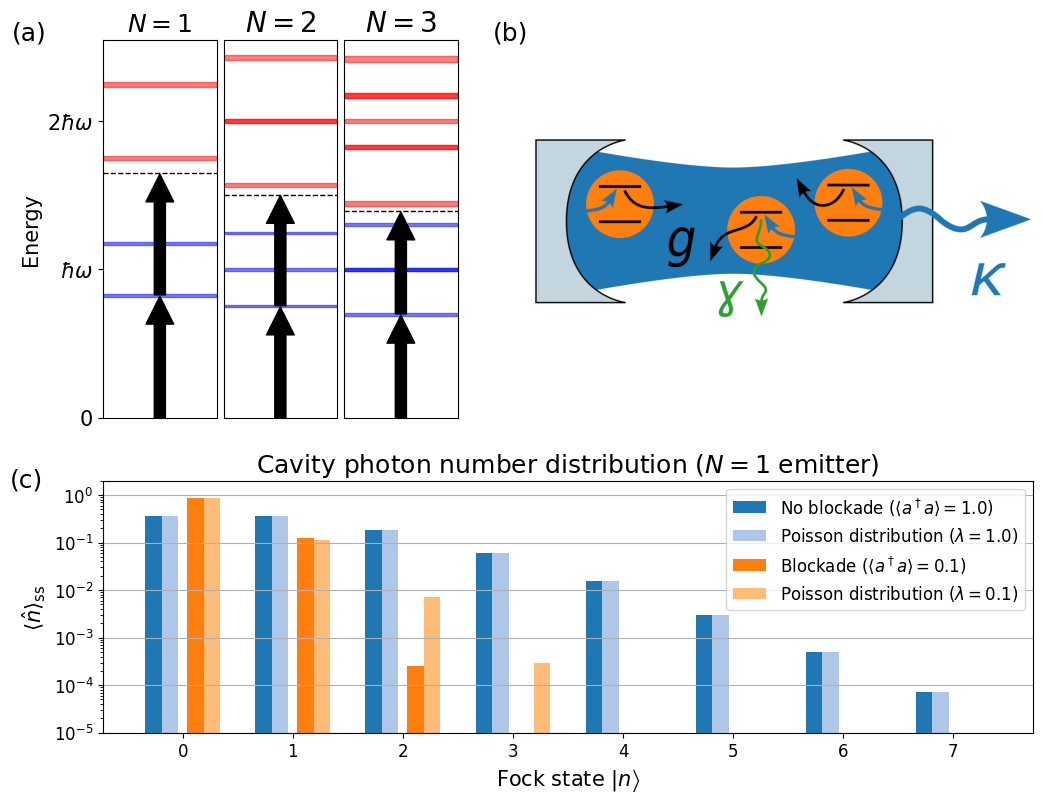

In [107]:
fig

In [109]:
fig.savefig("fig1.eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
